# **COVID-19 - Analysis, Visualization & Comparisons**

**👨‍💻Author: Muhammad Hassaan**

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadhassaaan) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)

## MetaData

### Context

- A new coronavirus designated 2019-nCoV was first identified in Wuhan, the capital of China's Hubei province
- People developed pneumonia without a clear cause and for which existing vaccines or treatments were not effective.
- The virus has shown evidence of human-to-human transmission
- Transmission rate (rate of infection) appeared to escalate in mid-January 2020
- As of 30 January 2020, approximately 8,243 cases have been confirmed

### Content

- **full_grouped.csv** - Day to day country wise no. of cases (Has County/State/Province level data)
- **covid_19_clean_complete.csv** - Day to day country wise no. of cases (Doesn't have County/State/Province level data)
- **country_wise_latest.csv** - Latest country level no. of cases
- **day_wise.csv** - Day wise no. of cases (Doesn't have country level data)
- **usa_county_wise.csv** - Day to day county level no. of cases
- **worldometer_data.csv** - Latest data from https://www.worldometers.info/

### Acknowledgements / Data Source

https://github.com/CSSEGISandData/COVID-19
https://www.worldometers.info/

### Collection methodology
https://github.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning

---

## Import Libraries

In [2]:
# data libraries 
import pandas as pd 
import numpy as np 

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objs as go 

# for working with date and time 
from datetime import datetime

# machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# evaluation metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# for saving the models
import joblib

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set visualization style for seaborn 
sns.set_style('whitegrid')

# display a message to confirm all libraries imported successfully
print('All libraries imported successfully!')

All libraries imported successfully!


## Load all the Dataset

In [3]:
# load all the datasets
df_full_grouped = pd.read_csv('../data/full_grouped.csv')
df_covid_19_clean = pd.read_csv('../data/covid_19_clean_complete.csv')
df_country_wise_latest = pd.read_csv('../data/country_wise_latest.csv')
df_day_wise = pd.read_csv('../data/day_wise.csv')
df_usa_county_wise = pd.read_csv('../data/usa_county_wise.csv')
df_worldometer_data = pd.read_csv('../data/worldometer_data.csv')

In [4]:
# Create a list of dataframes and file names for easy processing
data_files = {
    "full_grouped": df_full_grouped,
    "covid_19_clean_complete": df_covid_19_clean,
    "country_wise_latest": df_country_wise_latest,
    "day_wise": df_day_wise,
    "usa_county_wise": df_usa_county_wise,
    "worldometer_data": df_worldometer_data
}

In [5]:
# display the first rows of each dataset to understand structure
for name, df in data_files.items():
    print(f"\n--- {name} ---")
    print("Shape of the data:", df.shape)
    print("Columns in the dataset:", df.columns.tolist())
    display(df.head())
    print("\n" + "-"*50)


--- full_grouped ---
Shape of the data: (35156, 10)
Columns in the dataset: ['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'WHO Region']


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa



--------------------------------------------------

--- covid_19_clean_complete ---
Shape of the data: (49068, 10)
Columns in the dataset: ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa



--------------------------------------------------

--- country_wise_latest ---
Shape of the data: (187, 15)
Columns in the dataset: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa



--------------------------------------------------

--- day_wise ---
Shape of the data: (188, 12)
Columns in the dataset: ['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries']


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13



--------------------------------------------------

--- usa_county_wise ---
Shape of the data: (627920, 14)
Columns in the dataset: ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed', 'Deaths']


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0



--------------------------------------------------

--- worldometer_data ---
Shape of the data: (209, 16)
Columns in the dataset: ['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region']


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa



--------------------------------------------------


## Data Cleaning

In [6]:
# function to check for missing values and provide initial insights
def check_missing_values(df, name):
    print(f"\nChecking Missing Values for {name} dataset:")
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    
    if not missing_data.empty:
        print(missing_data)
    else:
        print("No Missing Valyes Found.")
    print("\n" + "-"*50)

In [7]:
# applying the function to each dataset to identify missing values
for name, df in data_files.items():
    check_missing_values(df, name)


Checking Missing Values for full_grouped dataset:
No Missing Valyes Found.

--------------------------------------------------

Checking Missing Values for covid_19_clean_complete dataset:
Province/State    34404
dtype: int64

--------------------------------------------------

Checking Missing Values for country_wise_latest dataset:
No Missing Valyes Found.

--------------------------------------------------

Checking Missing Values for day_wise dataset:
No Missing Valyes Found.

--------------------------------------------------

Checking Missing Values for usa_county_wise dataset:
FIPS      1880
Admin2    1128
dtype: int64

--------------------------------------------------

Checking Missing Values for worldometer_data dataset:
Continent             1
Population            1
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop     

### Handling Missing Values and Data  Inconsistencies

In [8]:
# 1. full_grouped dataset
# Since there are no missing values.


# 2. covid_19_clean_complete dataset
# replace missing values in Province/State column by Unknown
df_covid_19_clean['Province/State'] = df_covid_19_clean['Province/State'].fillna('Unknown')

# 3. country_wise_latest dataset
# No missing values found.

# 4. day_wise dataset
# No missing values found.

# 5. use_coutry_wise_latest dataset
# - For 'FIPS', fill with -1, as it's an ID field, which could indicate absence of an official code.
df_usa_county_wise['FIPS'] = df_usa_county_wise['FIPS'].fillna(-1)
# - For 'Admin2', fill with 'Unknown' since this likely represents a county or subdivision name.
df_usa_county_wise['Admin2'] = df_usa_county_wise['Admin2'].fillna('Unknown')

# 6. worldometer_data dataset
# Handle Missing Values differently for categorical and numerical columns:
df_worldometer_data['Continent'] = df_worldometer_data['Continent'].fillna('Unknown')
df_worldometer_data['Population'] = df_worldometer_data['Population'].fillna(0)

# fill missing numerical values with 0 for case and testing-related fields.
df_worldometer_data.fillna({
    'NewCases': 0,
    'TotalDeaths': 0,
    'NewDeaths': 0,
    'TotalRecovered': 0,
    'NewRecovered': 0,
    'ActiveCases': 0,
    'Serious,Critical': 0,
    'Tot Cases/1M pop': 0,
    'Deaths/1M pop': 0,
    'TotalTests': 0,
    'Tests/1M pop': 0
}, inplace=True)

# fill missing values WHO Region values with "Unknown"
df_worldometer_data['WHO Region'] = df_worldometer_data['WHO Region'].fillna('Unknown')

# re-check for any remaining missing values in each dataset
print("\nPost-Cleaning Missing Value Check:")

for name, df in data_files.items():
    check_missing_values(df, name)


Post-Cleaning Missing Value Check:

Checking Missing Values for full_grouped dataset:
No Missing Valyes Found.

--------------------------------------------------

Checking Missing Values for covid_19_clean_complete dataset:
No Missing Valyes Found.

--------------------------------------------------

Checking Missing Values for country_wise_latest dataset:
No Missing Valyes Found.

--------------------------------------------------

Checking Missing Values for day_wise dataset:
No Missing Valyes Found.

--------------------------------------------------

Checking Missing Values for usa_county_wise dataset:
No Missing Valyes Found.

--------------------------------------------------

Checking Missing Values for worldometer_data dataset:
No Missing Valyes Found.

--------------------------------------------------


## Exploratory Data Analysis (EDA)

### 1. Basic Data Summary

In [9]:
# function to perform basic data summary
def basic_data_summary(df, name):
    print(f"--- Summary Statistics of {name} ---")

    # display the shape of the dataset
    print(f"Shape of the dataset:", {df.shape})

    # display datatypes of the dataset
    print("Data Types and Non-null counts:")
    print(df.info())

    # display unique values count for each column
    print("\nUnique Values Count:")
    print(df.nunique())

    # display the summary statistics for each dataset
    print("\nSummary Statistics:")
    display(df.describe(include='all'))

    print("\n" + "-"*50 + "\n")

In [10]:
# loop through datasets and perform data summary for each
for name, data in data_files.items():
    basic_data_summary(data, name)

--- Summary Statistics of full_grouped ---
Shape of the dataset: {(35156, 10)}
Data Types and Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB
None

Unique Values Count:
Date                188
Country/Region      187
Confirmed         10732
Deaths             3598
Recovered          7649
Active             8440
New cases          2800
New dea

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
count,35156,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000,35156
unique,188,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,2020-01-22,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,187,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10528
mean,NaN,NaN,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593,NaN
std,NaN,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852,NaN
min,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000,NaN
25%,NaN,NaN,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,NaN
50%,NaN,NaN,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000,NaN
75%,NaN,NaN,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000,NaN



--------------------------------------------------

--- Summary Statistics of covid_19_clean_complete ---
Shape of the dataset: {(49068, 10)}
Data Types and Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  49068 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None

Unique Values Count:
Province/State       79
Country/Region      187
Lat                 260
Long           

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,49068,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,79,187,NaN,NaN,188,NaN,NaN,NaN,NaN,6
top,Unknown,China,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,Europe
freq,34404,6204,NaN,NaN,261,NaN,NaN,NaN,NaN,15040
mean,NaN,NaN,21.433730,23.528236,NaN,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,NaN
std,NaN,NaN,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,NaN
min,NaN,NaN,-51.796300,-135.000000,NaN,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,NaN,7.873054,-15.310100,NaN,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,23.634500,21.745300,NaN,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,NaN,41.204380,80.771797,NaN,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN



--------------------------------------------------

--- Summary Statistics of country_wise_latest ---
Shape of the dataset: {(187, 15)}
Data Types and Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
count,187,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000,187
unique,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
mean,NaN,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203,NaN
std,NaN,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838,NaN
min,NaN,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000,NaN
25%,NaN,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000,NaN
50%,NaN,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000,NaN
75%,NaN,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000,NaN



--------------------------------------------------

--- Summary Statistics of day_wise ---
Shape of the dataset: {(188, 12)}
Data Types and Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,188,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
unique,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,NaN,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,NaN,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,NaN,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,NaN,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,NaN,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000



--------------------------------------------------

--- Summary Statistics of usa_county_wise ---
Shape of the dataset: {(627920, 14)}
Data Types and Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            627920 non-null  float64
 5   Admin2          627920 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
count,6.279200e+05,627920,627920,627920.000000,627920.000000,627920,627920,627920,627920.000000,627920.000000,627920,627920,627920.000000,627920.000000
unique,NaN,6,6,NaN,NaN,1979,58,1,NaN,NaN,3340,188,NaN,NaN
top,NaN,US,USA,NaN,NaN,Unassigned,Texas,US,NaN,NaN,"American Samoa, US",1/22/20,NaN,NaN
freq,NaN,612128,612128,NaN,NaN,9776,48128,627920,NaN,NaN,188,3340,NaN,NaN
mean,8.342958e+07,NaN,NaN,834.491617,32962.694611,NaN,NaN,NaN,36.707212,-88.601474,NaN,NaN,357.284285,17.536328
std,4.314702e+06,NaN,NaN,36.492620,18695.710310,NaN,NaN,NaN,9.061572,21.715747,NaN,NaN,3487.282694,300.991466
min,1.600000e+01,NaN,NaN,16.000000,-1.000000,NaN,NaN,NaN,-14.271000,-174.159600,NaN,NaN,0.000000,0.000000
25%,8.401811e+07,NaN,NaN,840.000000,19064.500000,NaN,NaN,NaN,33.895587,-97.790204,NaN,NaN,0.000000,0.000000
50%,8.402921e+07,NaN,NaN,840.000000,31004.000000,NaN,NaN,NaN,38.002344,-89.486710,NaN,NaN,4.000000,0.000000
75%,8.404612e+07,NaN,NaN,840.000000,47125.500000,NaN,NaN,NaN,41.573069,-82.311265,NaN,NaN,63.000000,1.000000



--------------------------------------------------

--- Summary Statistics of worldometer_data ---
Shape of the dataset: {(209, 16)}
Data Types and Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         209 non-null    object 
 2   Population        209 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          209 non-null    float64
 5   TotalDeaths       209 non-null    float64
 6   NewDeaths         209 non-null    float64
 7   TotalRecovered    209 non-null    float64
 8   NewRecovered      209 non-null    float64
 9   ActiveCases       209 non-null    float64
 10  Serious,Critical  209 non-null    float64
 11  Tot Cases/1M pop  209 non-null    float64
 12  Deaths/1M pop     209 non-null    float64
 13  TotalTests        2

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
count,209,209,2.090000e+02,2.090000e+02,209.000000,209.000000,209.000000,2.090000e+02,209.000000,2.090000e+02,209.000000,209.000000,209.000000,2.090000e+02,209.000000,209
unique,209,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,USA,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,1,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
mean,NaN,NaN,3.026996e+07,9.171850e+04,37.904306,3411.516746,4.306220,5.775211e+04,24.488038,2.713487e+04,311.942584,3180.732057,88.293684,1.281623e+06,76728.416268,NaN
std,NaN,NaN,1.045351e+08,4.325867e+05,463.953776,14728.994111,56.894234,2.543468e+05,293.291420,1.729872e+05,1583.835315,5184.206523,168.207839,5.322273e+06,147869.771367,NaN
min,NaN,NaN,0.000000e+00,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,NaN,NaN,8.970950e+05,7.120000e+02,0.000000,12.000000,0.000000,3.080000e+02,0.000000,7.400000e+01,0.000000,279.000000,4.000000,1.080800e+04,6261.000000,NaN
50%,NaN,NaN,6.942854e+06,4.491000e+03,0.000000,70.000000,0.000000,2.010000e+03,0.000000,8.580000e+02,2.000000,1000.000000,20.000000,1.099460e+05,29041.000000,NaN
75%,NaN,NaN,2.552886e+07,3.689600e+04,0.000000,600.000000,0.000000,1.959600e+04,0.000000,7.113000e+03,41.000000,3806.000000,80.000000,6.924300e+05,75521.000000,NaN



--------------------------------------------------



### 2. Date Range Analysis

What is the date range covered in each dataset?

In [11]:
# Function to get date range for each dataset
def date_range_summary(df, dataset_name, date_column):
    print(f"--- Date Range for {dataset_name} ---")
    
    # Convert date_column to datetime if it's not already
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    # Calculate date range
    start_date = df[date_column].min()
    end_date = df[date_column].max()
    
    print(f"Date Range: {start_date.date()} to {end_date.date()}")
    print("\n" + "-"*50 + "\n")

# Loop through datasets and check date ranges
date_columns = {
    "full_grouped": "Date",
    "covid_19_clean_complete": "Date",
    "country_wise_latest": None,  # No date column in this dataset
    "day_wise": "Date",
    "usa_county_wise": "Date",
    "worldometer_data": None  # No date column in this dataset
}

for name, data in data_files.items():
    date_column = date_columns[name]
    if date_column:  # Only perform date range summary if a date column exists
        date_range_summary(data, name, date_column)
    else:
        print(f"--- {name} does not have a date column. ---")
        print("\n" + "-"*50 + "\n")

--- Date Range for full_grouped ---
Date Range: 2020-01-22 to 2020-07-27

--------------------------------------------------

--- Date Range for covid_19_clean_complete ---
Date Range: 2020-01-22 to 2020-07-27

--------------------------------------------------

--- country_wise_latest does not have a date column. ---

--------------------------------------------------

--- Date Range for day_wise ---
Date Range: 2020-01-22 to 2020-07-27

--------------------------------------------------

--- Date Range for usa_county_wise ---
Date Range: 2020-01-22 to 2020-07-27

--------------------------------------------------

--- worldometer_data does not have a date column. ---

--------------------------------------------------



### 3. Trend Analysis

How have confirmed cases, deaths, and recoveries trended over time globally and for specific countries?

In [12]:
# Function to plot trends
def plot_trend_analysis(df, country=None):
    # Set the style for seaborn
    sns.set(style="whitegrid")
    
    # Convert 'Date' to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Aggregate data if a specific country is not provided
    if country:
        df = df[df['Country/Region'] == country]
    else:
        df = df.groupby('Date').agg({
            'Confirmed': 'sum',
            'Deaths': 'sum',
            'Recovered': 'sum'
        }).reset_index()

    # Calculate moving averages
    df['Confirmed_MA'] = df['Confirmed'].rolling(window=7).mean()
    df['Deaths_MA'] = df['Deaths'].rolling(window=7).mean()
    df['Recovered_MA'] = df['Recovered'].rolling(window=7).mean()

    # Plotting
    plt.figure(figsize=(14, 7))
    
    # Confirmed cases trend
    plt.subplot(3, 1, 1)
    sns.lineplot(data=df, x='Date', y='Confirmed_MA', color='blue', label='Confirmed Cases (7-Day MA)')
    plt.title(f'Trend of Confirmed Cases over Time' if not country else f'Trend of Confirmed Cases in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()
    
    # Deaths trend
    plt.subplot(3, 1, 2)
    sns.lineplot(data=df, x='Date', y='Deaths_MA', color='red', label='Deaths (7-Day MA)')
    plt.title(f'Trend of Deaths over Time' if not country else f'Trend of Deaths in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of Deaths')
    plt.legend()

    # Recoveries trend
    plt.subplot(3, 1, 3)
    sns.lineplot(data=df, x='Date', y='Recovered_MA', color='green', label='Recovered (7-Day MA)')
    plt.title(f'Trend of Recoveries over Time' if not country else f'Trend of Recoveries in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of Recoveries')
    plt.legend()

    plt.tight_layout()
    plt.show()

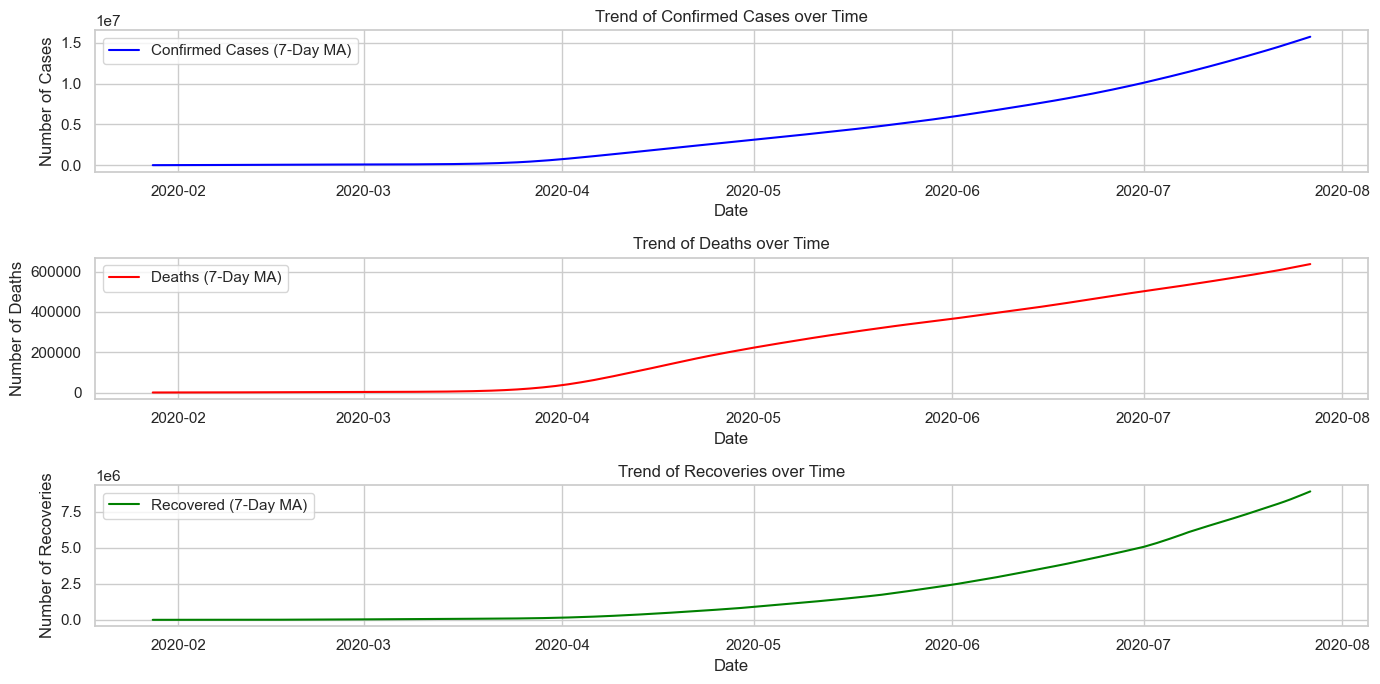

In [13]:
# global trend analysis 
plot_trend_analysis(df_full_grouped)

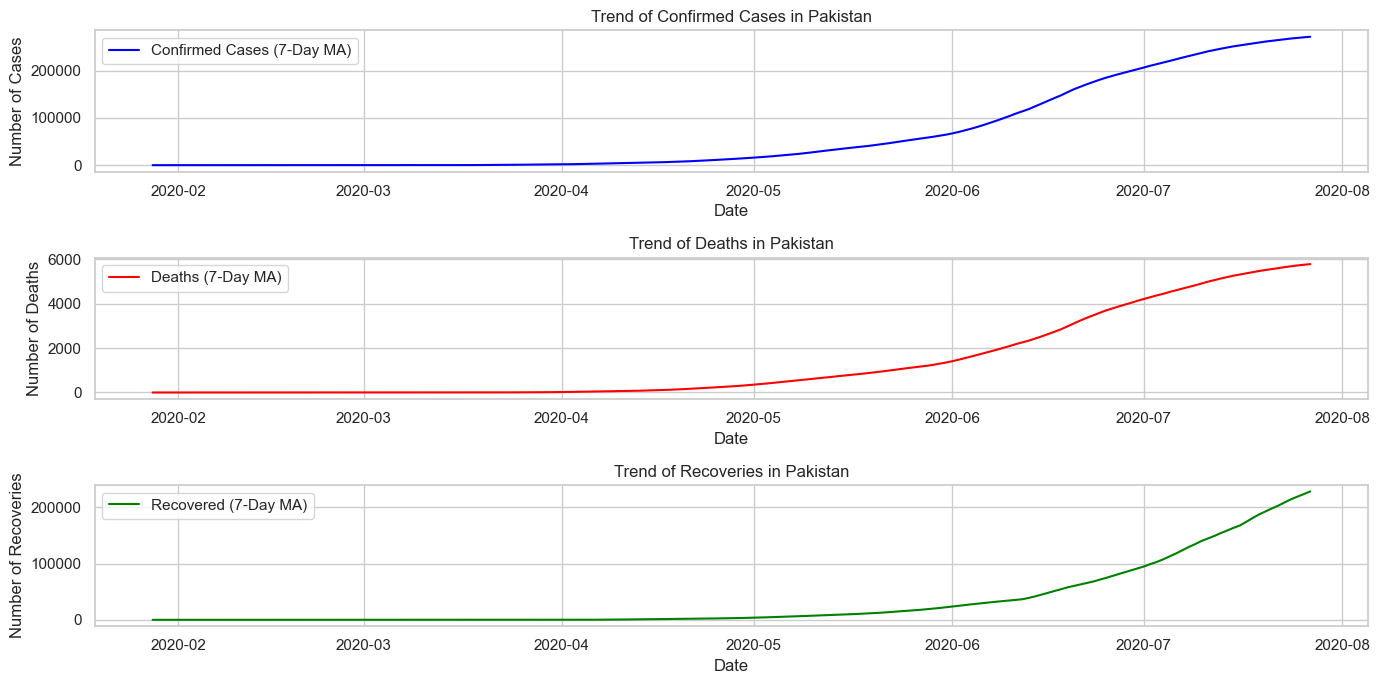

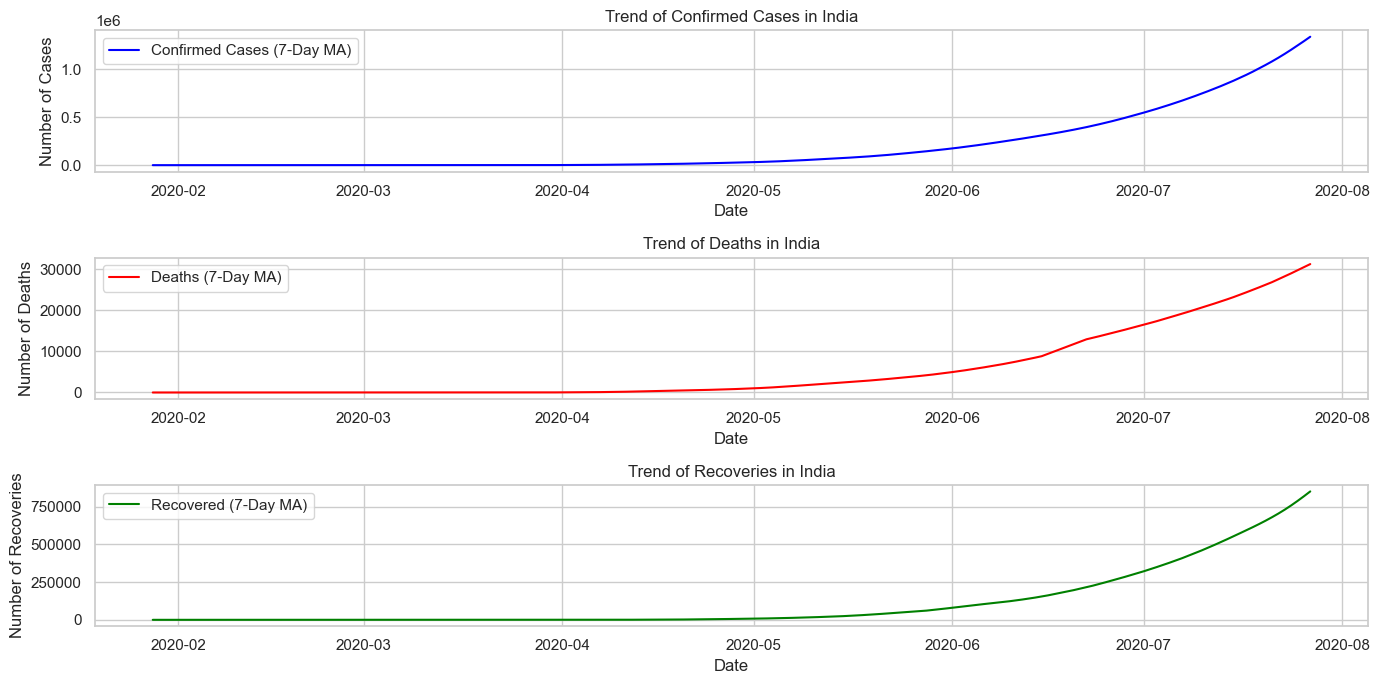

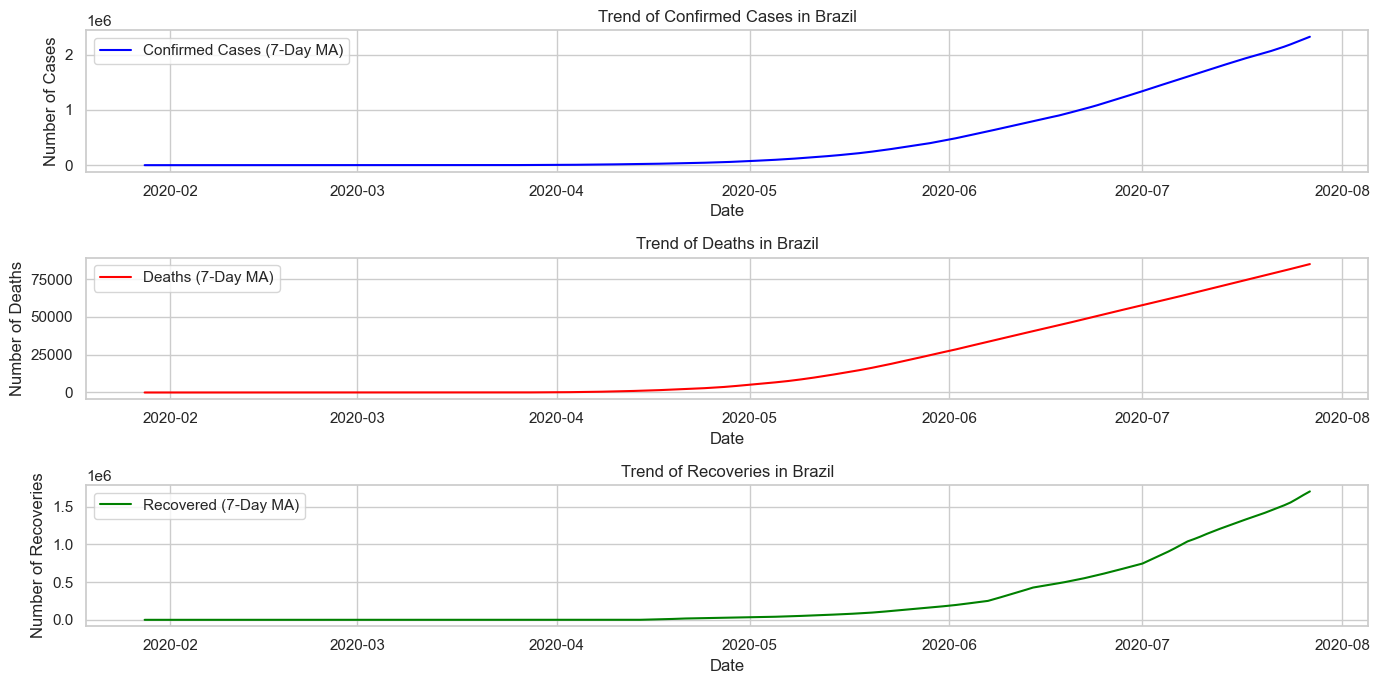

In [14]:
# Trend analysis for specific countries (example)
countries = ['Pakistan', 'India', 'Brazil']
for country in countries:
    plot_trend_analysis(df_full_grouped, country)

**Insights**:
- Plotted global and country-specific trends using 7-day moving averages for smoother visualization.
- Used subplots to display separate trends for confirmed cases, deaths, and recoveries over time.

### 4. Growth Rate
What is the daily and weekly growth rate of cases and deaths?

In [15]:
# calulate dialy and weekly growth rates for conformed cases and deaths in the "df_full_grouped" dataset
df_full_grouped['Daily Growth Rate (Cases)'] = df_full_grouped['Confirmed'].pct_change().fillna(0) * 100
df_full_grouped['Daily Growth Rate (Deaths)'] = df_full_grouped['Deaths'].pct_change().fillna(0) * 100

# calculate weekly growth rate using a 7-day difference
df_full_grouped['Weekly Growth Rate (Cases)'] = df_full_grouped['Confirmed'].pct_change(periods=7).fillna(0) * 100
df_full_grouped['Weekly Growth Rate (Deaths)'] = df_full_grouped['Deaths'].pct_change(periods=7).fillna(0) * 100

# display the top rows with new growth rate columns for review
# Display the top rows with new growth rate columns for review
display(df_full_grouped[['Date', 'Country/Region', 'Confirmed', 'Deaths', 
              'Daily Growth Rate (Cases)', 'Daily Growth Rate (Deaths)', 
              'Weekly Growth Rate (Cases)', 'Weekly Growth Rate (Deaths)']].head(50))

,Date,Country/Region,Confirmed,Deaths,Daily Growth Rate (Cases),Daily Growth Rate (Deaths),Weekly Growth Rate (Cases),Weekly Growth Rate (Deaths)
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0,0.0,0.0
5,2020-01-22,Antigua and Barbuda,0,0,0.0,0.0,0.0,0.0
6,2020-01-22,Argentina,0,0,0.0,0.0,0.0,0.0
7,2020-01-22,Armenia,0,0,0.0,0.0,0.0,0.0
8,2020-01-22,Australia,0,0,0.0,0.0,0.0,0.0
9,2020-01-22,Austria,0,0,0.0,0.0,0.0,0.0


**Insights:**

- Calculated daily and weekly growth rates to capture day-to-day and week-to-week spread rates.
- Growth rates show the percentage increase, aiding in tracking virus transmission speed over different intervals.

### 5. Country/Region Comparison

Which countries have the highest confirmed cases, deaths, and recoveries?

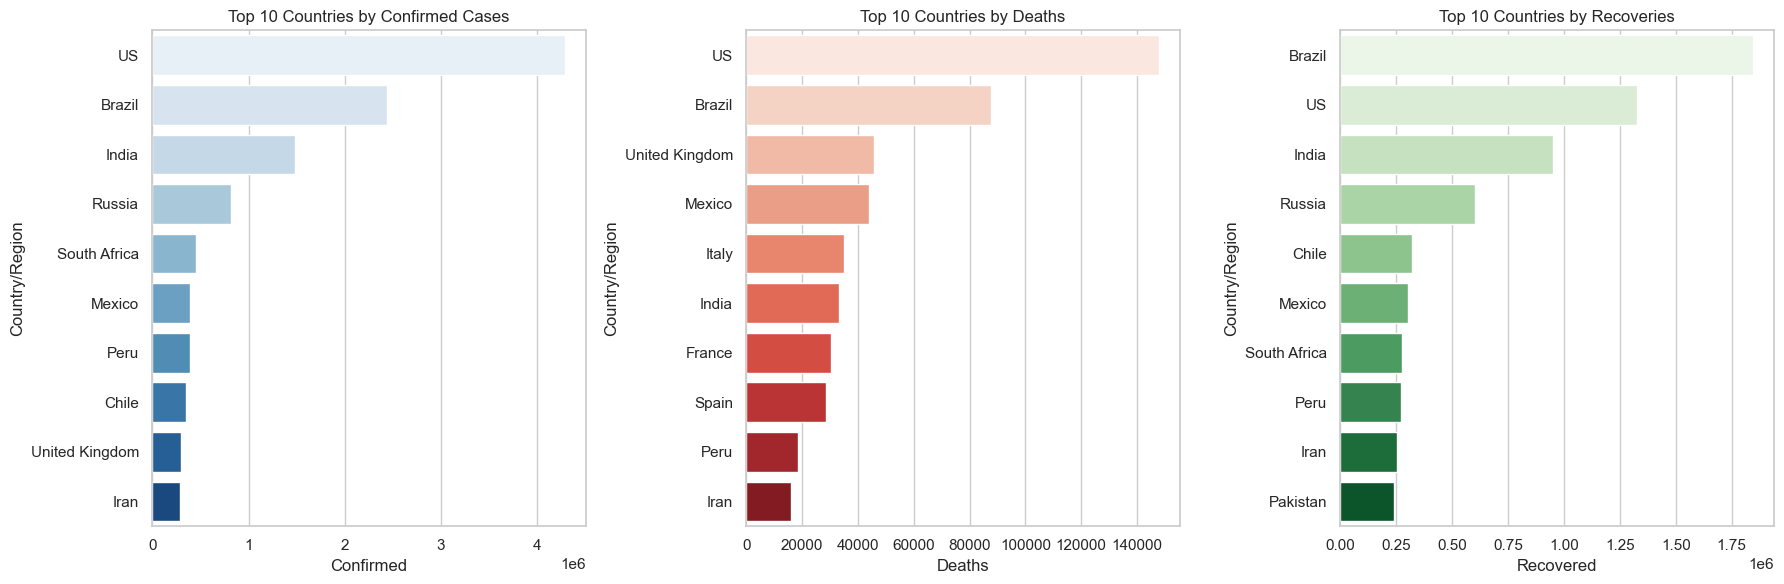

In [16]:
# Select top 10 countries with the highest confirmed cases, deaths, and recoveries from the 'country_wise_latest' dataset
top_countries_cases = df_country_wise_latest.nlargest(10, 'Confirmed')[['Country/Region', 'Confirmed']]
top_countries_deaths = df_country_wise_latest.nlargest(10, 'Deaths')[['Country/Region', 'Deaths']]
top_countries_recovered = df_country_wise_latest.nlargest(10, 'Recovered')[['Country/Region', 'Recovered']]

# Plot bar charts for top 10 countries in confirmed cases, deaths, and recoveries
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries_cases, ax=axes[0], palette='Blues')
axes[0].set_title('Top 10 Countries by Confirmed Cases')
sns.barplot(x='Deaths', y='Country/Region', data=top_countries_deaths, ax=axes[1], palette='Reds')
axes[1].set_title('Top 10 Countries by Deaths')
sns.barplot(x='Recovered', y='Country/Region', data=top_countries_recovered, ax=axes[2], palette='Greens')
axes[2].set_title('Top 10 Countries by Recoveries')

plt.tight_layout()
plt.show()

### 6. Mortality and Recovery Rates

What are the death and recovery rates by country/region?	

In [17]:
# calulate mortality and recovery rates for each country in 'df_country_wise_latest' dataset
df_country_wise_latest["Mortality Rate (%)"] = (df_country_wise_latest['Deaths'] / df_country_wise_latest['Confirmed']) * 100
df_country_wise_latest["Recovery Rate (%)"] = (df_country_wise_latest['Recovered'] / df_country_wise_latest['Confirmed']) * 100

# display the top rows with new rate columns
df_country_wise_latest[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 
                     'Mortality Rate (%)', 'Recovery Rate (%)']].head(10)

,Country/Region,Confirmed,Deaths,Recovered,Mortality Rate (%),Recovery Rate (%)
0,Afghanistan,36263,1269,25198,3.499435,69.486805
1,Albania,4880,144,2745,2.950820,56.250000
2,Algeria,27973,1163,18837,4.157581,67.339935
3,Andorra,907,52,803,5.733186,88.533627
4,Angola,950,41,242,4.315789,25.473684
5,Antigua and Barbuda,86,3,65,3.488372,75.581395
6,Argentina,167416,3059,72575,1.827185,43.350098
7,Armenia,37390,711,26665,1.901578,71.315860
8,Australia,15303,167,9311,1.091289,60.844279
9,Austria,20558,713,18246,3.468236,88.753770


### 7. Cases per Million 

How does the infection rate per million people compare across countries?

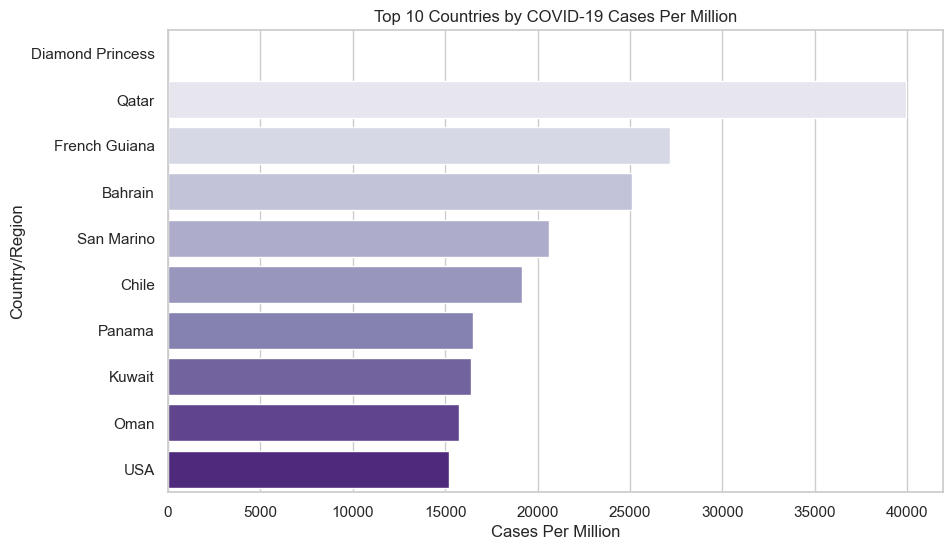

In [18]:
# calulate cases per million for each country in 'worldmeter_data' dataset
df_worldometer_data['Cases per Million'] = (df_worldometer_data['TotalCases'] / df_worldometer_data['Population']) * 1000000

# select top 10 countries by cases per million for visualization
df_top_countries_per_million = df_worldometer_data.nlargest(10, 'Cases per Million')[['Country/Region', 'Cases per Million']]

# plot cases per million across top 10 countries
plt.figure(figsize=(10,6))
sns.barplot(x='Cases per Million', y='Country/Region', data=df_top_countries_per_million, palette='Purples')
plt.title('Top 10 Countries by COVID-19 Cases Per Million')
plt.xlabel('Cases Per Million')
plt.ylabel('Country/Region')
plt.show()

### 8. Monthly and Weekly Patterns

Are there any significant monthly or weekly patterns in confirmed cases, deaths, and recoveries?

In [19]:
# convert 'Date' column to datetime format in 'df_full_grouped' dataset
df_full_grouped['Date'] = pd.to_datetime(df_full_grouped['Date'])

# extract month and week from the data for grouping
df_full_grouped['Month'] = df_full_grouped['Date'].dt.month
df_full_grouped['Week'] = df_full_grouped['Date'].dt.isocalendar().week

# group by month and calculate the mean confirmed cases, deaths, and recoveries
monthly_data = df_full_grouped.groupby('Month')[['Confirmed', 'Deaths', 'Recovered']].mean()

# group by week and calculate the mean confirmed cases, deaths, amd recoveries
weekly_data = df_full_grouped.groupby('Week')[['Confirmed', 'Deaths', 'Recovered']].mean()

<Figure size 1400x600 with 0 Axes>

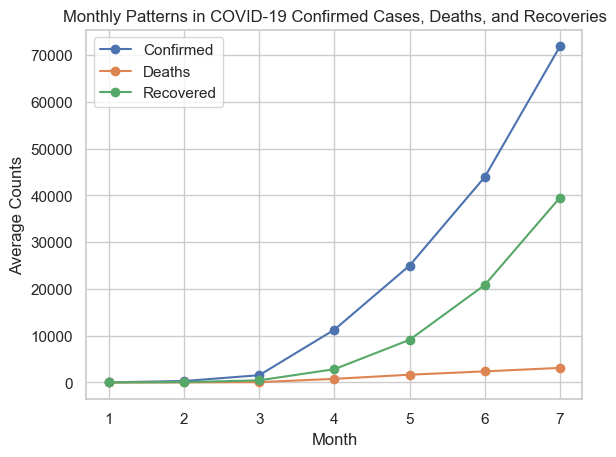

In [20]:
# plot monthly patterns
plt.figure(figsize=(14,6))
monthly_data.plot(kind='line', marker='o')
plt.title('Monthly Patterns in COVID-19 Confirmed Cases, Deaths, and Recoveries')
plt.xlabel('Month')
plt.ylabel('Average Counts')
plt.show()

<Figure size 1400x600 with 0 Axes>

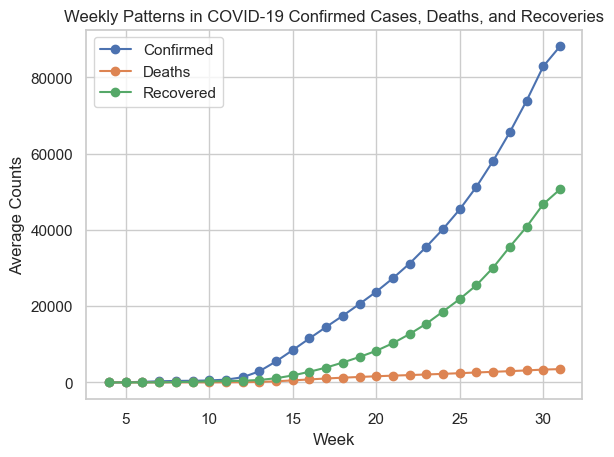

In [21]:
# Plot weekly patterns
plt.figure(figsize=(14, 6))
weekly_data.plot(kind='line', marker='o')
plt.title('Weekly Patterns in COVID-19 Confirmed Cases, Deaths, and Recoveries')
plt.xlabel('Week')
plt.ylabel('Average Counts')
plt.show()

### 9. Top 10 Regions with High Cases Over Time 

How do the top 10 affected regions' cases change over time?

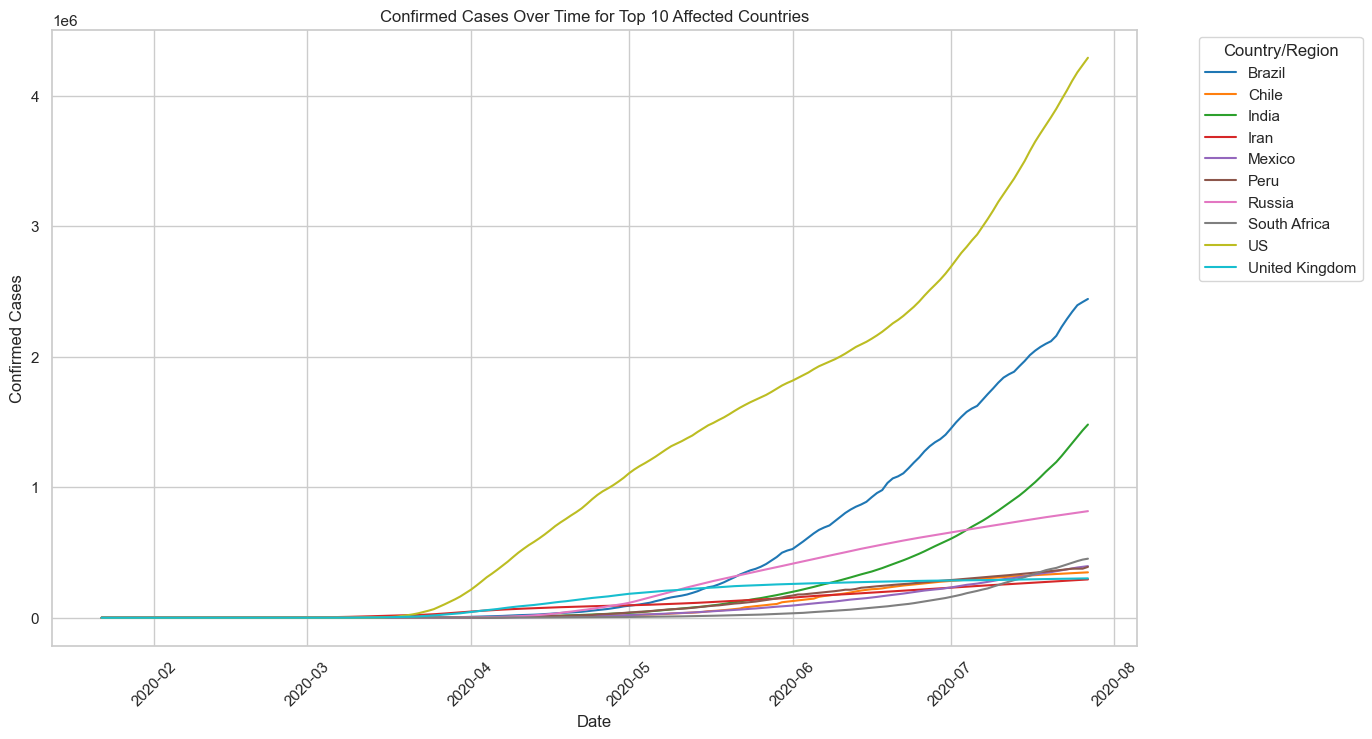

In [24]:
# identify the top 10 countries with the highest confirmed cases in 'df_country_wise_latest' dataset
top_10_countries = df_country_wise_latest.nlargest(10, 'Confirmed')['Country/Region'].tolist()

# filter the 'df_full_grouped' dataset for inly these top 10 countries
top_10_countries = df_full_grouped[df_full_grouped['Country/Region'].isin(top_10_countries)]

# plot confirmed cases over time for each of the top 10 countries
plt.figure(figsize=(14,8))
sns.lineplot(x='Date', y='Confirmed', hue='Country/Region', data=top_10_countries, palette='tab10')
plt.title('Confirmed Cases Over Time for Top 10 Affected Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='Country/Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### 10. New Cases, Deaths, and Recoveries

What are the daily new cases, deaths, and recoveries by country?

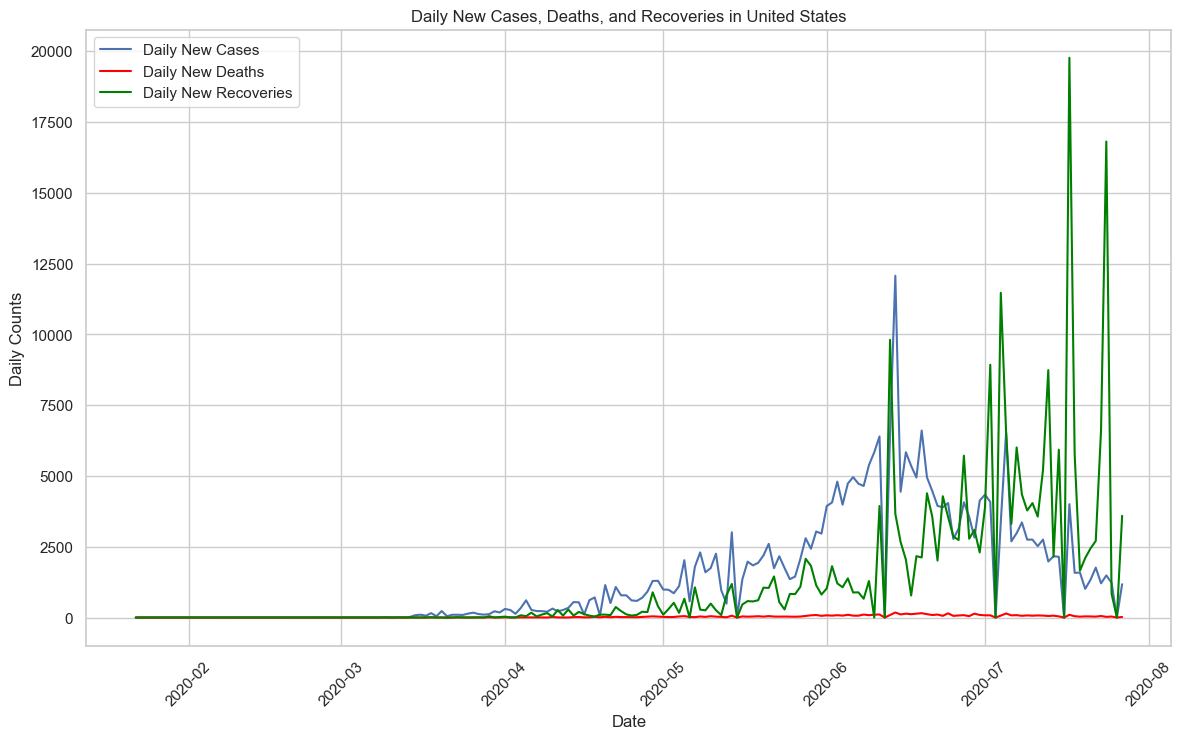

In [32]:
# calculate daily new cases, deaths, and recoveries by country in 'full_grouped' dataset
df_full_grouped = df_full_grouped.sort_values(['Country/Region', 'Date'])

df_full_grouped['Daily New Cases'] = df_full_grouped.groupby('Country/Region')['Confirmed'].diff().fillna(0)
df_full_grouped['Daily New Deaths'] = df_full_grouped.groupby('Country/Region')['Deaths'].diff().fillna(0)
df_full_grouped['Daily New Recoveries'] = df_full_grouped.groupby('Country/Region')['Recovered'].diff().fillna(0)

# filter for a sample country, let's choose Pakistan
sample_country = df_full_grouped[df_full_grouped['Country/Region'] == 'Pakistan']

# Plot daily new cases, deaths, and recoveries for the sample country
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Daily New Cases', data=sample_country, label='Daily New Cases')
sns.lineplot(x='Date', y='Daily New Deaths', data=sample_country, label='Daily New Deaths', color='red')
sns.lineplot(x='Date', y='Daily New Recoveries', data=sample_country, label='Daily New Recoveries', color='green')
plt.title('Daily New Cases, Deaths, and Recoveries in United States')
plt.xlabel('Date')
plt.ylabel('Daily Counts')
plt.legend()
plt.xticks(rotation=45)
plt.show()